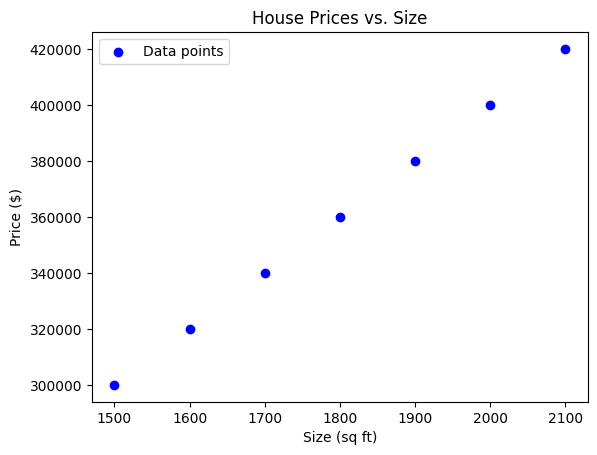

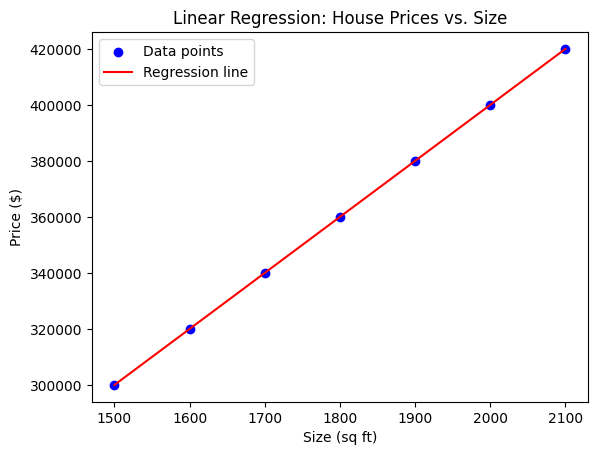

Sum of Squared Error (SSE): 0.0
Slope: 200.0
Intercept: 0.0
[300000. 320000. 340000. 360000. 380000. 400000. 420000.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sizes = np.array([1500, 1600, 1700, 1800, 1900, 2000, 2100])
prices = np.array([300000, 320000, 340000, 360000, 380000, 400000, 420000])

plt.scatter(sizes, prices, color='blue', label='Data points')
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("House Prices vs. Size")
plt.legend()
plt.show()

def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    xx_mean = np.mean(x * x)

    slope = (xy_mean - x_mean * y_mean) / (xx_mean - x_mean**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept

slope, intercept = linear_regression(sizes, prices)

predicted_prices = slope * sizes + intercept

plt.scatter(sizes, prices, color='blue', label='Data points')
plt.plot(sizes, predicted_prices, color='red', label='Regression line')
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("Linear Regression: House Prices vs. Size")
plt.legend()
plt.show()

sse = np.sum((prices - predicted_prices)**2)
print(f"Sum of Squared Error (SSE): {sse}")

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

print(predicted_prices)

Intercept (b0): -86.2294

Slope Coefficients (b1, b2, ...):
isMale: 4.6934
isBlack: 2.7301
isSmoker: 8.7452
isDiabetic: 10.6387
isHypertensive: 4.8681
Age: 0.9185
Systolic: 0.2110
Cholesterol: 0.0669
HDL: -0.1010

Linear Regression Equation:
Risk = -86.23 + (4.6934 * isMale) + (2.7301 * isBlack) + (8.7452 * isSmoker) + (10.6387 * isDiabetic) + (4.8681 * isHypertensive) + (0.9185 * Age) + (0.2110 * Systolic) + (0.0669 * Cholesterol) + (-0.1010 * HDL)


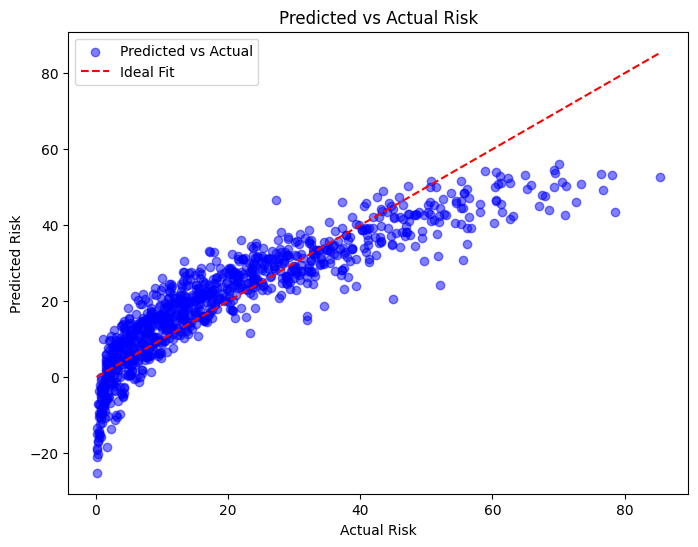


Sum of Squared Errors (SSE): 59215.4326


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv("heartRisk.csv")

X = df.drop(columns=["Risk"])
y = df["Risk"]

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept (b0): {intercept:.4f}\n")
print("Slope Coefficients (b1, b2, ...):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

equation = f"Risk = {intercept:.2f}"
for i, col in enumerate(X.columns):
    equation += f" + ({coefficients[i]:.4f} * {col})"

print("\nLinear Regression Equation:")
print(equation)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="dashed", label="Ideal Fit")
plt.xlabel("Actual Risk")
plt.ylabel("Predicted Risk")
plt.title("Predicted vs Actual Risk")
plt.legend()
plt.show()

SSE = np.sum((y - y_pred) ** 2)
print(f"\nSum of Squared Errors (SSE): {SSE:.4f}")